## Excess Returns Portfolio Optimization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib as mpl
import seaborn as sns
import scipy as scs
import math

In [ ]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [8]:
file_path = "C:/Users/dcste/OneDrive/Portfolio_Theory/multi_asset_etf_data.xlsx"
excess_return = pd.read_excel(file_path, sheet_name = "excess returns")
excess_return = excess_return.set_index("Date")
noa = 11
weights = np.random.random(noa)
weights /= np.sum(weights)

excess_return.head()


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008439,-0.001554,0.155028,0.114636,0.137906,-0.028006,0.295597,0.229649,0.022329,0.098792,-0.018505
2009-05-31,0.054144,0.163134,0.159872,0.132390,0.029027,-0.020301,0.023199,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004549,-0.026858,-0.023094,-0.014649,0.032917,-0.006171,-0.025462,0.044850,-0.004035,-0.001254,0.001383
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069218,0.008344,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007200,0.131503,0.032977,-0.004586,0.036504,0.007977


In [23]:
def port_ret(weights):
    return np.sum(excess_return.mean() *weights)*252
def port_vol(weights):
    return np.sqrt(np.dot(weights.T,np.dot(excess_return.cov()*252, weights)))
prets = []
pvols = []
for p in range(5000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)


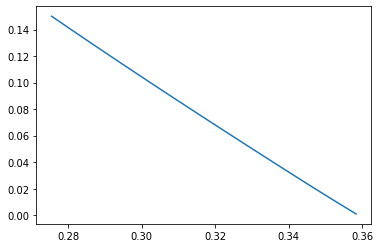

In [24]:
plt.plot(tvols, trets)

In [10]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(noa))
eweights = np.array(noa*[1./noa,])
eweights
min_func_sharpe(eweights)

-3.05291073012954

In [11]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", constraints = cons)
pd.DataFrame(opts['x'].round(3), index = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"], columns = ["Weights"])

,Weights
International Treasury ETF,-2.516
Commodity Index,0.468
Emerging,0.744
MSCI EAFE,-0.268
High Yield Index,2.010
7-10 Year Treasury Bond,4.794
U.S. Real Estate,-0.601
Private Equity,-0.913
MultiStrat HedgeFund,-8.819
SPY,4.893


In [12]:
print("The resulting portfolio return and portfolio volatility from the optimal weights are", np.round(port_ret(opts['x']),4), "and",np.round(port_vol(opts["x"]),4), "respectively.")

The resulting portfolio return and portfolio volatility from the optimal weights are 13.9854 and 1.582 respectively.


In [13]:
optv = sco.minimize(port_vol, eweights, method = "SLSQP", bounds = bnds, constraints = cons)
pd.DataFrame(optv['x'].round(3), index = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"], columns = ["Weights"])

,Weights
International Treasury ETF,0.000
Commodity Index,0.018
Emerging,0.000
MSCI EAFE,0.000
High Yield Index,0.000
7-10 Year Treasury Bond,0.429
U.S. Real Estate,0.000
Private Equity,0.000
MultiStrat HedgeFund,0.551
SPY,0.000


In [20]:
cons = ({'type':'eq', 'fun': lambda x: port_ret(x)-tret}, {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1)for x in weights)
trets = np.linspace(.001,.15,100)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol,eweights, method = "SLSQP", bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Text(0.5, 1.0, 'Efficient Frontier for Given Risk Level ')

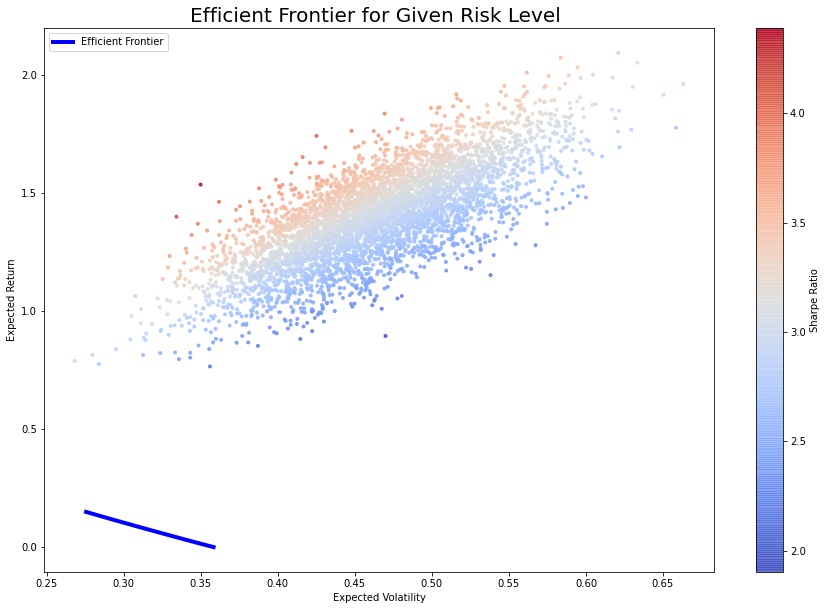

In [21]:
plt.figure(figsize = (15,10))
plt.scatter(pvols, prets, c = prets/pvols, marker = '.', alpha = 0.8, cmap = 'coolwarm')
plt.plot(tvols, trets, 'b',label = "Efficient Frontier",lw =4.0)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.legend(loc = "upper left")
plt.colorbar(label = "Sharpe Ratio")
plt.title("Efficient Frontier for Given Risk Level ", fontsize = 20)